In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{\omega * (z^3-1)^2}{((z+\omega * (z^3-1))^3-1)-(z^3-1)}$$

of the Steffensen's iteration method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [12]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z-((-0.3)*(z*z*z-1)*(z*z*z-1))/((z+(-0.3)*(z*z*z-1))*(z+(-0.3)*(z*z*z-1))*(z+(-0.3)*(z*z*z-1))-1-(z*z*z-1))
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Steffensen's iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

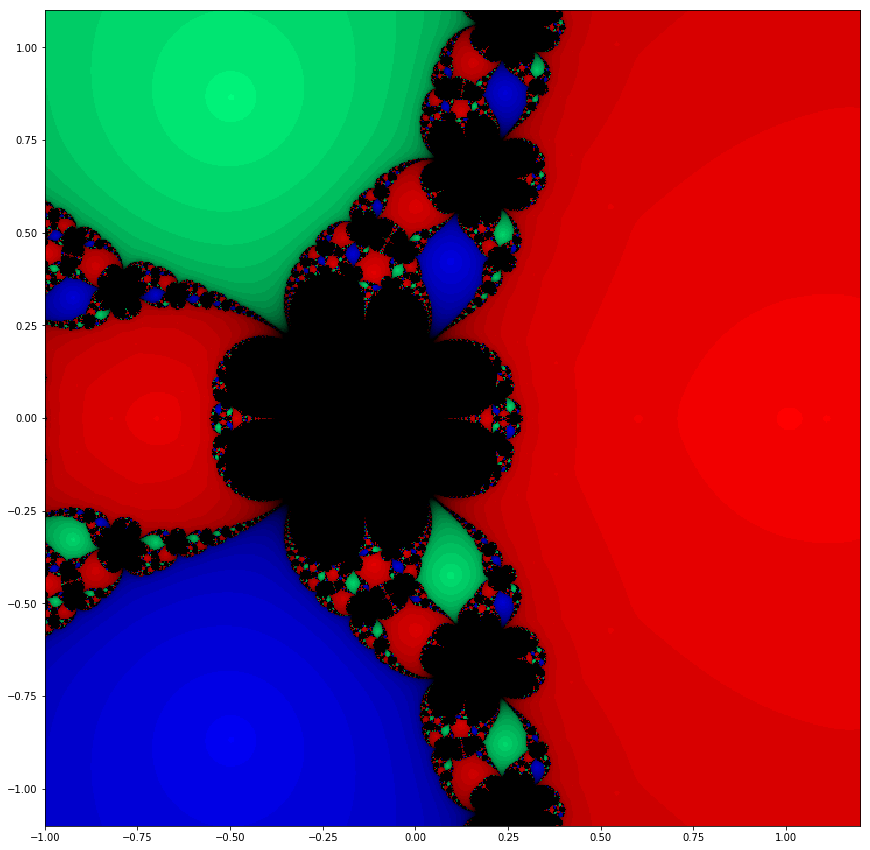

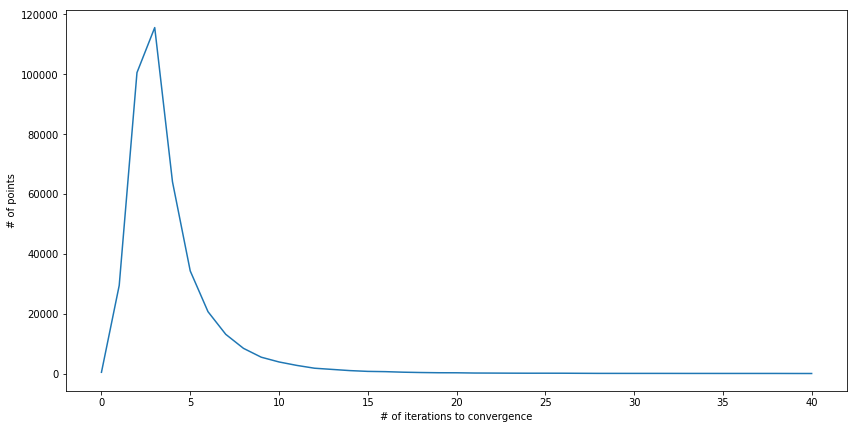

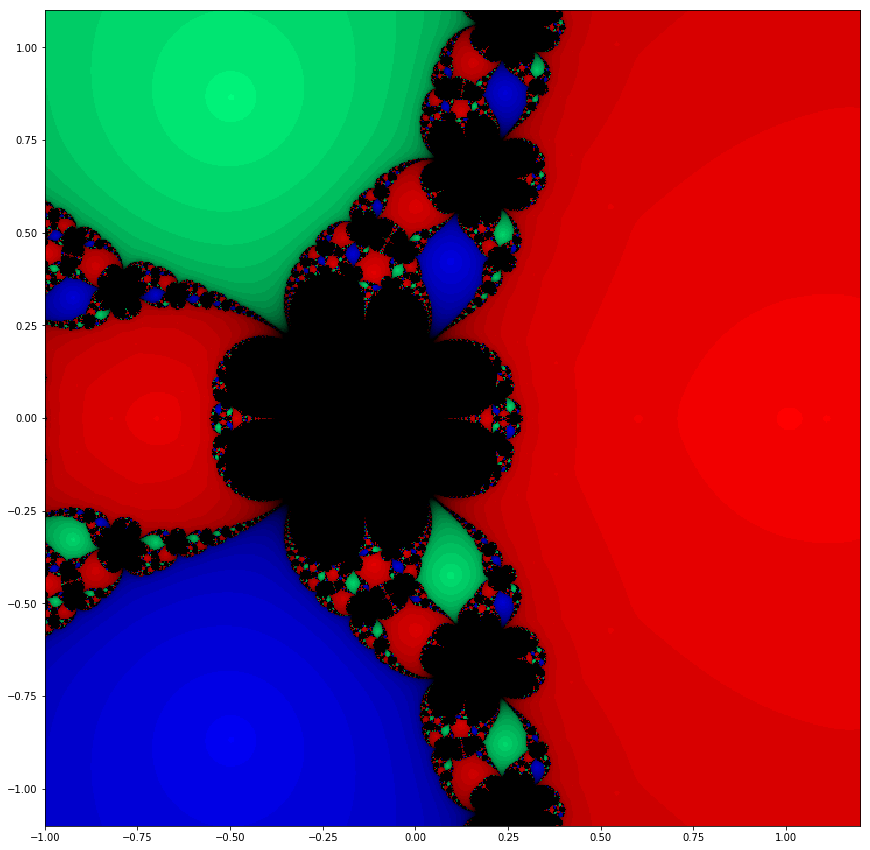

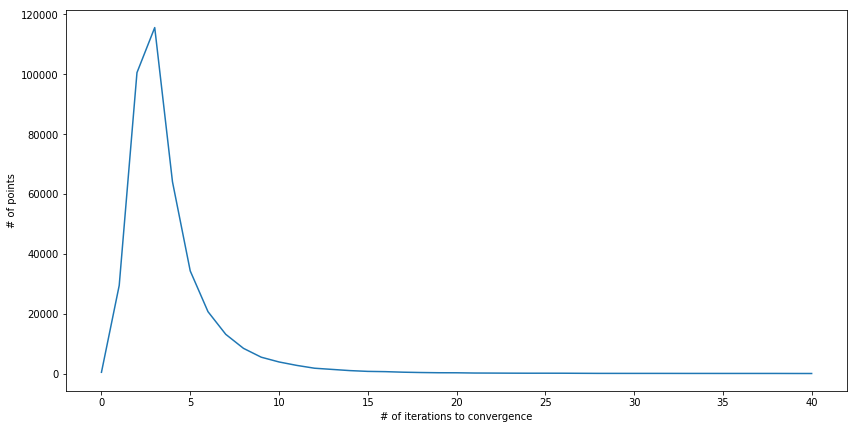

In [16]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[np.maximum(0,np.minimum(1,(sit-k)*f*c)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

QUESTION 4:

For $\omega = 0.3$, we get:
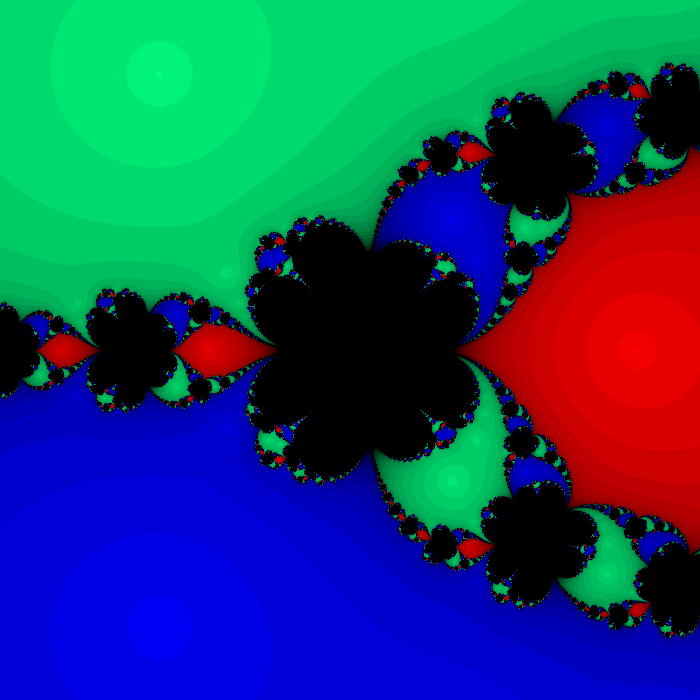
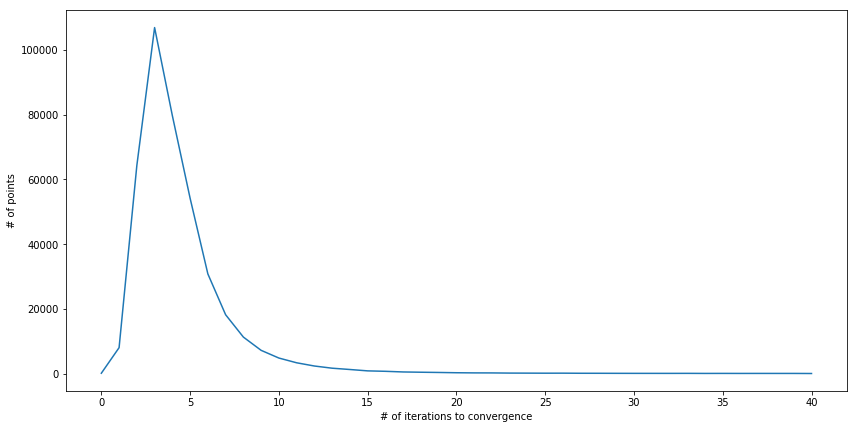
For $\omega = 1$, we get:
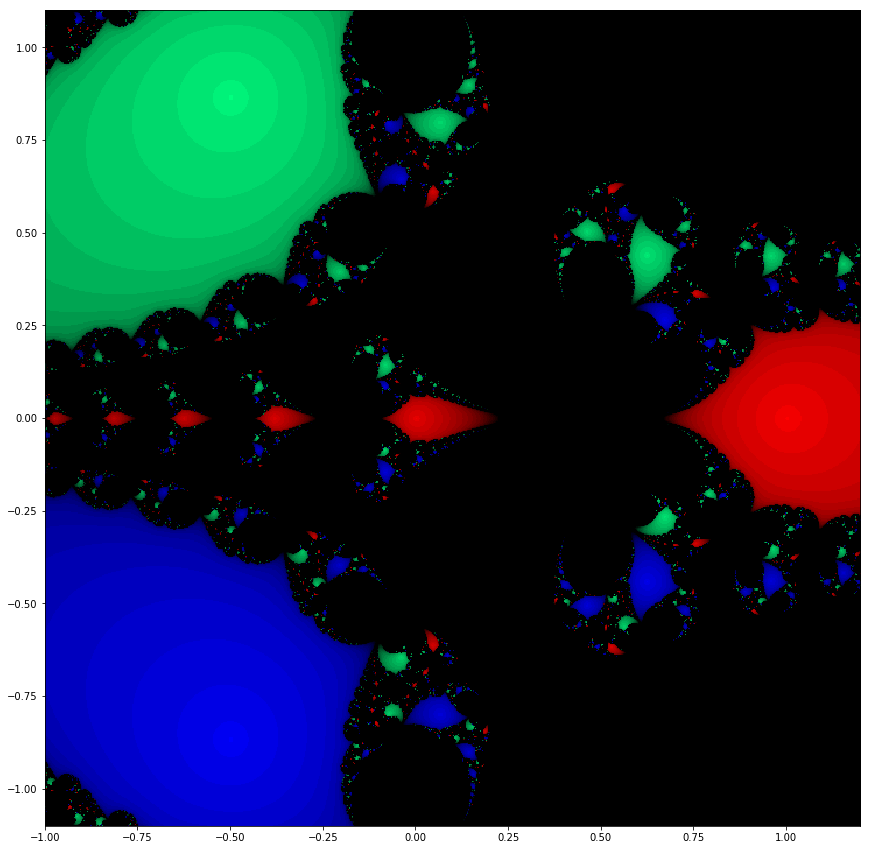
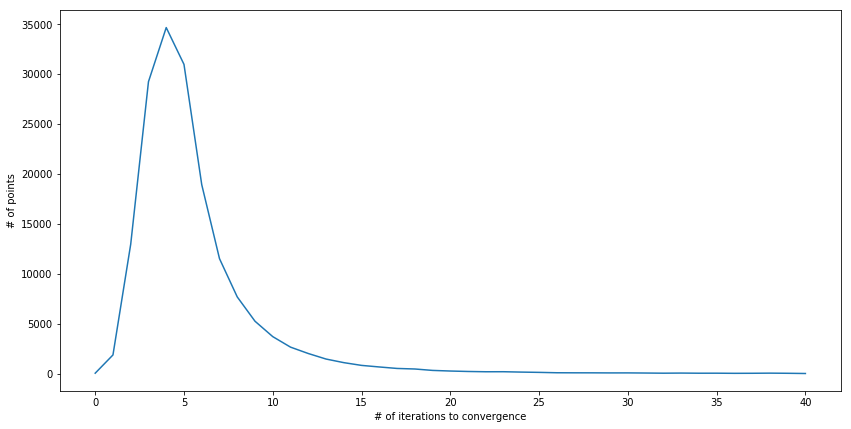
For $\omega = 4$, we get:
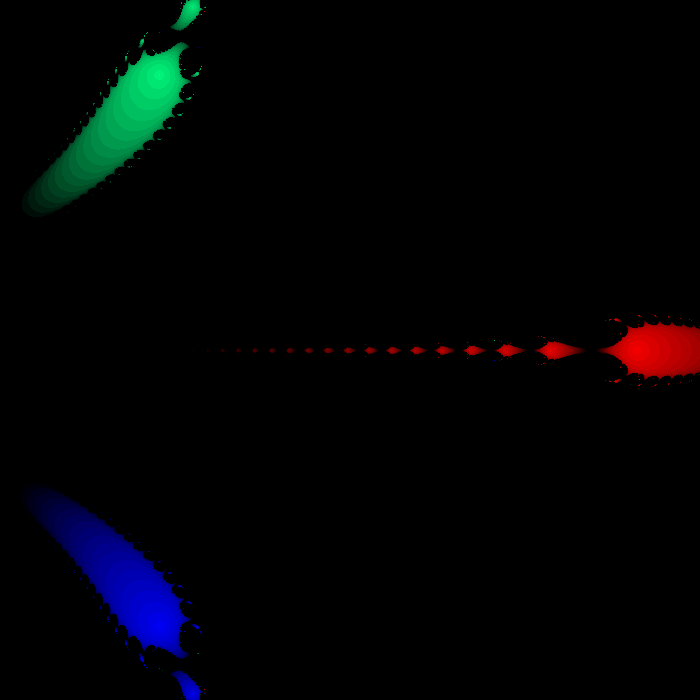
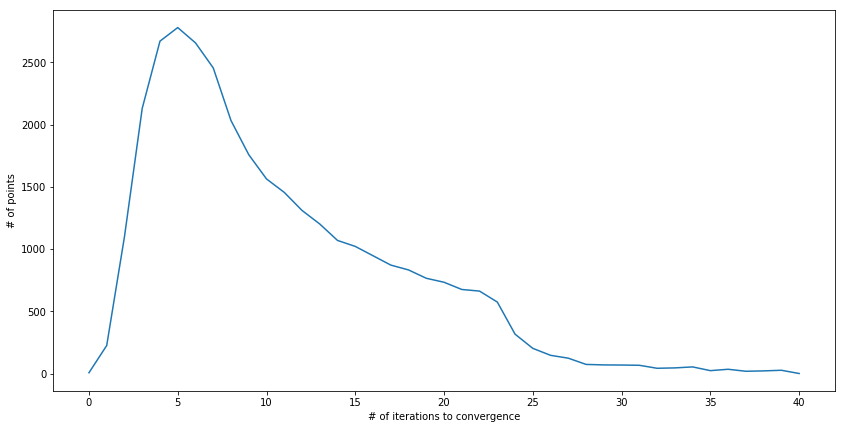

We immediatly note that the bigger $\omega$ is, THE more the image is covered with the three colors.
We can conclude that the bigger $\omega$ is, the more points will converge to the root.
However, looking at the graphs, we see that the bigger $\omega$ is, the more iterations it takes, in general, for the points to converge to their roots.
Note that for $\omega < 0$, we remark the same pattern.

QUESTION 5:
   
As we saw in the notes for Newton-Raphson, it suffices to show $\phi '(\alpha) = 0$, with $f(\alpha)=0$.

$$\phi'(\alpha)=\lim_{x\rightarrow \alpha}\frac{\phi(x)-\phi(\alpha)}{x-\alpha}=1-\frac{f'(\alpha)}{f'(\alpha)}=0$$

since by assumption $f'(\alpha)\neq 0$. It remains to show the 2nd equality.

$$\frac{\phi(x)-\phi(\alpha)}{x-\alpha}=\frac{x-\frac{f(x)}{T(\xi ,x)}-\alpha}{x-\alpha}=\frac{x-\alpha-\frac{f(x)-f(\alpha)}{T(\xi ,x)}}{x-\alpha}$$

$$=1-\frac{f(x)-f(\alpha)}{x-\alpha}*\frac{1}{T(\xi ,x)}$$

since $f(\alpha)=0$ and where $T(\xi ,x)=f'(x)+\frac{1}{2}f''(\xi)f(x)$ for $\xi \in(x,x+f(x))$ is obtained by Taylor's expansion of $f(x+f(x))$, we get; for $\xi \in(x,x+f(x))$:

$$f(x+f(x))=f(x)+f'(x)*f(x)+\frac{1}{2}f''(\xi)f(x)^2$$

And so: $$\frac{f(x+f(x))-f(x)}{f(x)}=T(\xi , x)$$

So with the limit, we get:

$$\lim_{x\rightarrow \alpha}\frac{\phi(x)-\phi(\alpha)}{x-\alpha}=1-\frac{f'(\alpha)}{f'(\alpha)}=0=\phi'(\alpha)$$

Note that we did the computations with $\omega = 1$ for simplicity as $\omega$ is a constant, and so does not change anything.

We obtain that Steffensen's method is locally a quadratically convergent method.